# **- Machine Learning -**
# _* Classification *_
## **+ ``Multi-Class Classification`` +**
### **+ _Iris Data_ +**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Iris Data **:**

+ This is perhaps the best known database to be found in the pattern recognition literature.
<br> Fisher's paper is a classic in the field and is referenced frequently to this day.
<br> The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
+ Bu belki de **desen tanıma** literatüründe bulunabilecek en iyi veri tabanıdır.
<br> **'Fisher'**'ın makalesi, alanında bir klasiktir ve bu güne kadar sıklıkla başvurulmaktadır.
<br> Veri seti, her biri **50** örnekten oluşan **3** sınıf içerir, burada her sınıf bir tür **'iris bitkisini'** ifade eder.

In [2]:
iris = pd.read_csv('iris.csv')

iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [83]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [84]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
pd.set_option("display.max_rows" , 999)
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


+ We only take the first two features **:**
+ Sadece ilk iki **FEATURE** olan **sepal.length** ve **sepal.width** kolonlarını alıyoruz **:**

In [13]:
X = iris.iloc[: , :2].values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

+ **"object"** tipinde olan **"variety"** kolonunu, **"category"** tipine çevirelim **:**

In [14]:
iris.variety = iris.variety.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


**+--- NOTE ---> '``.cat``'** metodunu kullanabilmemiz için öncelikle kolonumuzun tipini (type) **, 'category'** tipine çevirmemiz gerekiyor...

In [15]:
iris.variety.unique()

['Setosa', 'Versicolor', 'Virginica']
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

+ **'Y' Set**'i de **,** bu **'category (cat)'** tipine çevirdiğimiz kolonun **kodlarının değerleri** üzerinden oluşturalım ki **'Y'**'ler birer **numerik** değer olsun... **:**
<br> Yani **: Setosa = 0 | Versicolor = 1 | Virginica = 2**
<br> şeklinde olacak...

In [16]:
Y = iris.variety.cat.codes.values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=1 , stratify=Y)

+ **Lojistik Regresyon sınıflandırıcısı** oluşturun ve **FIT** edin **:**
<br> Öncelikle **Logistic Regression** modelini çağıralım. Sonra bir **'instance'** oluşturalım ve **'train'** setleri kullanarak **FIT edelim (Eğitelim).**

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000 , penalty='none')

classifier.fit(X_train , y_train)

LogisticRegression(max_iter=1000, penalty='none')

+ TEST verilerini kullanarak tahmin yapın **:**

In [19]:
y_pred = classifier.predict(X_test)

+ Şimdi **, Logistic Regression** için DEFAULT olan **'accuracy'** skoruna bakalım **:**

In [20]:
classifier.score(X_test , y_test)

0.7

+ **metrics** sınıfını çağıralım ve **'accuracy'** skoruna bakalım **:**

In [21]:
from sklearn import metrics

print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.7


In [95]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[10,  0,  0],
       [ 0,  6,  4],
       [ 1,  4,  5]], dtype=int64)

Yukarıda gördüğümüz gibi, buraca **Confusion Matrix** biraz daha farklı **,** yani **3x3 matris** olarak görünüyor. **Multi-Index** olduğu için **en az '3' kolon** oluyor. Bundan dolayı da **Multi-Index**'lerde **Confusion Matrix en az 3x3 matris** oluyor...

<br> Yukarıdaki **Confusion Matrix**'i inceleyelim **=**
+ Matrix'in ilk satırı olan **[10 , 0 , 0]** satırının anlamı **:** Model **;** birinci sınıf çiçekten (**Setosa**) kaç tanesini ilk kolon olan kendi kolonuna koymuş, kaç tanesini yanlış bir şekilde diğer çiçeklerin kolonlarına koymuş onu gösteriyor... ( **'Setosa'** çiçeklerinin tamamını doğru bir şekilde kendi kolonuna koymuş. )
+ Matrix'in ikinci satırı olan **[0 , 6 , 4]** satırının anlamı **:** Model **;** ikinci sınıf çiçekten (**Versicolor**) kaç tanesini ikinci kolon olan kendi kolonuna koymuş, kaç tanesini yanlış bir şekilde diğer çiçeklerin kolonlarına koymuş onu gösteriyor... ( **'Versicolor'** çiçeklerinin **'6'** tanesini doğru kolona, **'4'** tanesini de yanlış bir şekilde **'Virginia'** çiçeğinin kolonuna koymuş. )
+ Matrix'in üçüncü satırı olan **[1 , 4 , 5]** satırının anlamı **:** Model **;** üçüncü sınıf çiçekten (**Virginia**) kaç tanesini üçüncü kolon olan kendi kolonuna koymuş, kaç tanesini yanlış bir şekilde diğer çiçeklerin kolonlarına koymuş onu gösteriyor... ( **'Virginia'** çiçeklerinin **'5'** tanesini doğru kolona, diğerlerini de; yanlış bir şekilde diğer çiçeklerin kolonlarına koymuş. )

Yani gördüğümüz gibi, **'Setosa'** çiçeğini doğru şekilde sınıflandırmış ama diğer çiçek türleri kendi aralarında biraz karışmış durumda...

+ Plot the **decision boundary**... For that, we will assign a color to each point in the mesh **[x_min, x_max]x[y_min, y_max] :**
+ **Karar Sınırını (Decision Boundary)** çizin... Bunun için ( **[x_min , x_max] . [y_min , y_max]** ) ağındaki her bir noktaya bir renk atayacağız **:**

**++++ NOTE ++++**
<br> **``np.meshgrid( )`` fonksiyonu :**
<br>``np.meshgrid( )`` fonksiyonunun amacı, **'x'** değerleri dizisinden ve **'y'** değerleri dizisinden bir **dikdörtgen ızgara (grid)** oluşturmaktır.
<br> https://pybilim.wordpress.com/tag/numpy-meshgrid/

In [22]:
def plot_dec_boundary(estimator, X , Y , h):
    #   Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh ( [x_min , x_max] . [y_min , y_max] )
    #   'x' ve 'y' değerlerini (Sepal Width ve Sepal Length değerlerini) alıyoruz ve bir mesh (grid) oluşturuyoruz.
    # Her bir Veri Noktası için bir tahmin döndürmemiz gerekiyor. Bunun için de MİN ve MAX değerlerini alıyoruz ve
    # bu iki aralık içerisindeki bütün noktalar için bir grid oluşturuyoruz :
    X = np.array(X)
    X_min , X_max = X[: , 0].min() - .5 , X[: , 0].max() + .5
    y_min , y_max = X[: , 1].min() - .5 , X[: , 1].max() + .5
    XX , yy = np.meshgrid(np.arange(X_min , X_max , h) , np.arange(y_min , y_max , h))
    #   Logistic Regression'u kullanarak, Oluşturduğumuz o grid'in her bir noktası için bir tahmin yapıyoruz : 
    Z = estimator.predict(np.c_[XX.ravel() , yy.ravel()])
    
    #   Put the result into a color plot :
    #   Şimdi de o tahminleri sınıflara atıyoruz ve renk grafiği ile çizdiriyoruz :
    Z = Z.reshape(XX.shape)
    plt.figure(1 , figsize=(4 , 3))
    plt.pcolormesh(XX , yy , Z , cmap=plt.cm.Paired)

    #   Plot also the points :
    #   Noktaları da çizelim :
    plt.scatter(X[: , 0] , X[: , 1] , c=Y , edgecolors='k' , cmap=plt.cm.Paired)
    plt.xlabel('x1 : Sepal Length')
    plt.ylabel('x2 : Sepal Width')

    plt.xlim(XX.min() , XX.max())
    plt.ylim(yy.min() , yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

<ipython-input-22-5b20b7a76368>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX , yy , Z , cmap=plt.cm.Paired)


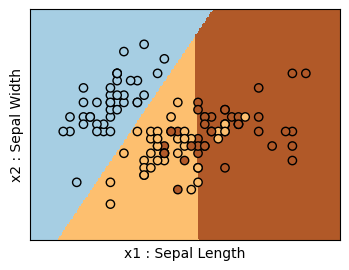

In [23]:
plot_dec_boundary(classifier , X_train , y_train , h=0.02)

Yukarıda gördüğümüz gibi, **'Setosa'** çiçeklerinin tamamı doğru sınıfında yer alıyor. Ama diğer ikisi kendi arasında biraz karışmış...
<br> Ve yine yukarıdaki grafikte gördüğümüz gibi, bu modelleme için **'Desicion Boundary'**'ler hep **düz çizgi** şeklide...
+ Şimdi de **KNN** tekniği ile yeni bir model kuralım **:**

In [24]:
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [25]:
classifier.score(X_test , y_test)

0.7333333333333333

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[10,  0,  0],
       [ 0,  7,  3],
       [ 1,  4,  5]], dtype=int64)

<ipython-input-22-5b20b7a76368>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX , yy , Z , cmap=plt.cm.Paired)


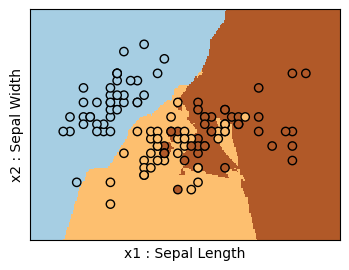

In [28]:
plot_dec_boundary(classifier , X_train , y_train , h=0.02)